In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/filtered_data_northern_vietnam.csv')

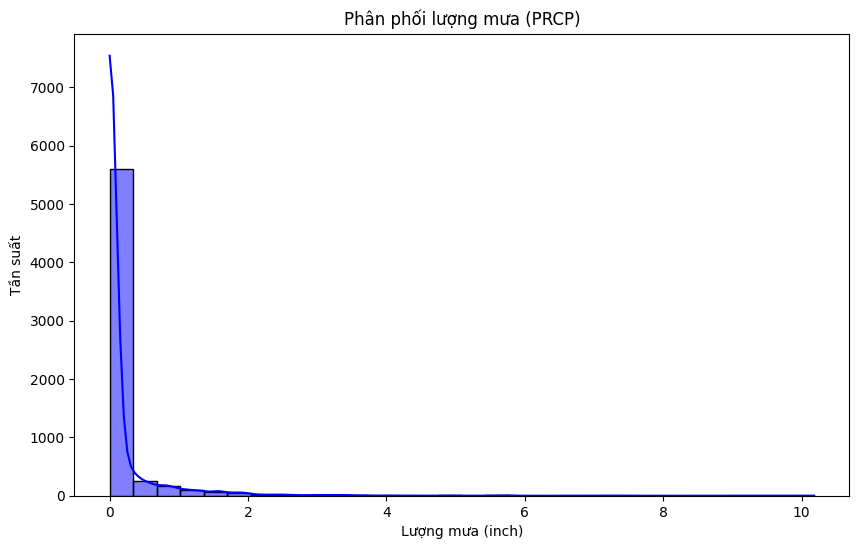

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PRCP'], bins=30, kde=True, color="blue")
plt.title("Phân phối lượng mưa (PRCP)")
plt.xlabel("Lượng mưa (inch)")
plt.ylabel("Tần suất")
plt.show()

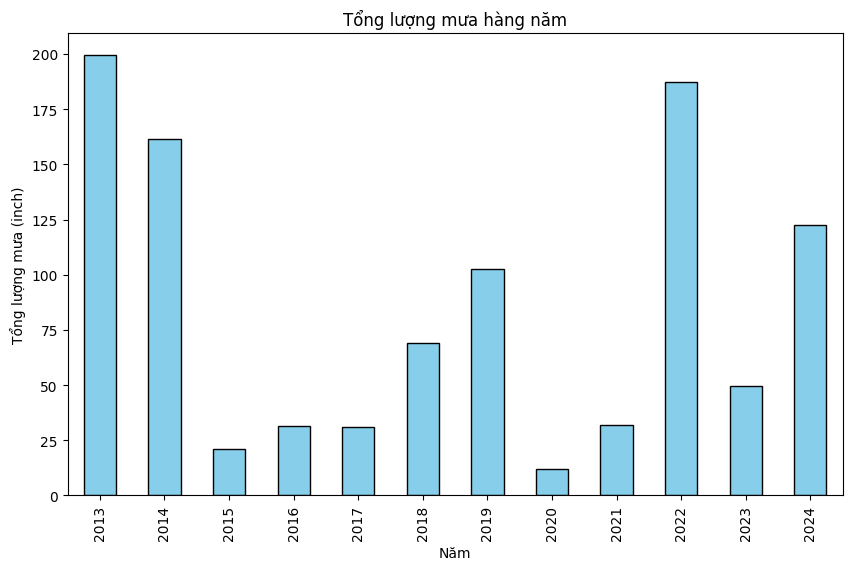

In [3]:
yearly_prcp = df.groupby('YEAR')['PRCP'].sum()
plt.figure(figsize=(10, 6))
yearly_prcp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Tổng lượng mưa hàng năm")
plt.xlabel("Năm")
plt.ylabel("Tổng lượng mưa (inch)")
plt.show()


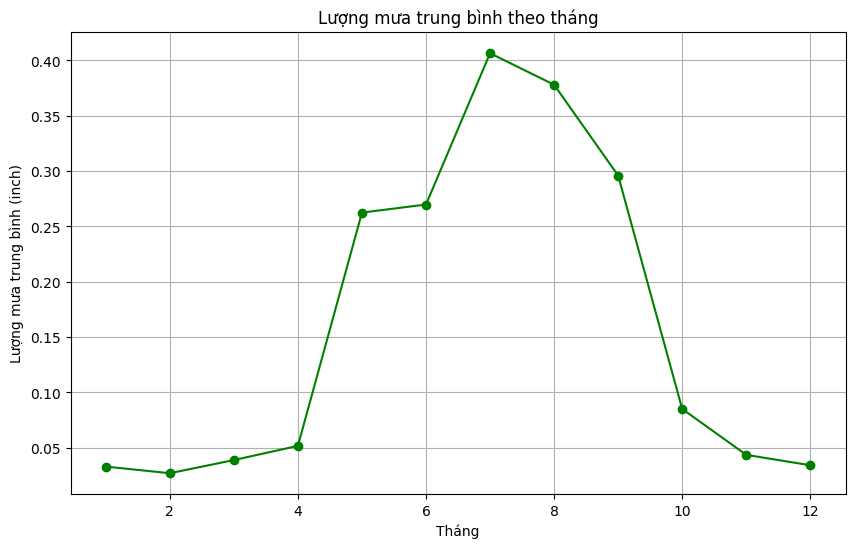

In [4]:
monthly_avg_prcp = df.groupby('MONTH')['PRCP'].mean()
plt.figure(figsize=(10, 6))
monthly_avg_prcp.plot(kind='line', marker='o', color='green')
plt.title("Lượng mưa trung bình theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Lượng mưa trung bình (inch)")
plt.grid()
plt.show()

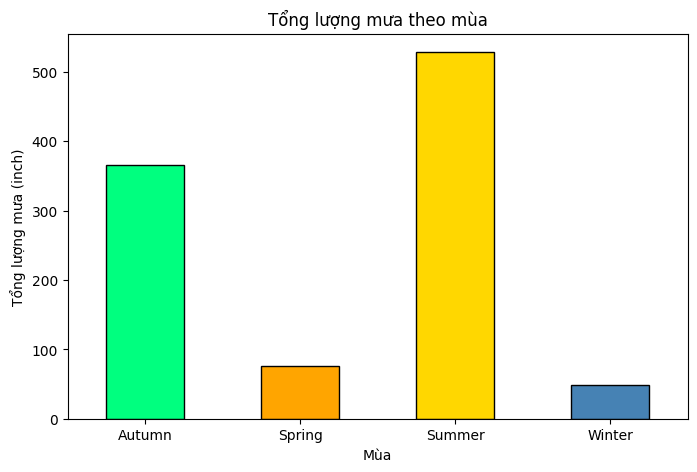

In [5]:
seasonal_prcp = df.groupby('SEASON')['PRCP'].sum()
plt.figure(figsize=(8, 5))
seasonal_prcp.plot(kind='bar', color=['springgreen', 'orange', 'gold', 'steelblue'], edgecolor='black')
plt.title("Tổng lượng mưa theo mùa")
plt.xlabel("Mùa")
plt.ylabel("Tổng lượng mưa (inch)")
plt.xticks(rotation=0)
plt.show()

In [6]:
max_prcp_row = df.loc[df['PRCP'].idxmax()]
print("\nNgày có lượng mưa cao nhất:")
print(max_prcp_row)



Ngày có lượng mưa cao nhất:
Unnamed: 0          13594
DATE           2018-07-21
STATION       VMM00048826
TMAX                   77
TMIN                   75
PRCP                10.18
YEAR                 2018
MONTH                   7
SEASON             Summer
Name: 3206, dtype: object


In [7]:
rainy_days = df[df['PRCP'] > 0]
rainy_percentage = (len(rainy_days) / len(df)) * 100
print(f"\nTần suất ngày mưa (PRCP > 0): {rainy_percentage:.2f}%")


Tần suất ngày mưa (PRCP > 0): 33.24%


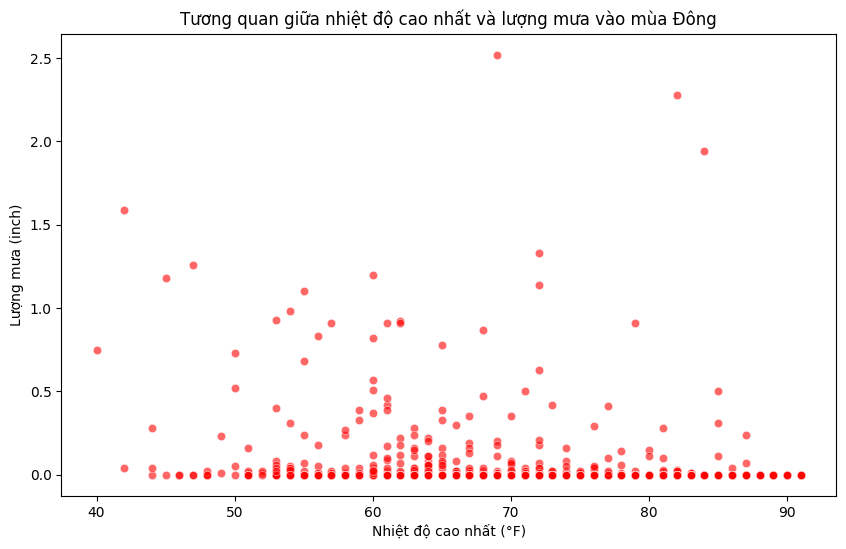

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TMAX', y='PRCP', data=df[df['SEASON'] == 'Winter'], color='red', alpha=0.6)
plt.title("Tương quan giữa nhiệt độ cao nhất và lượng mưa vào mùa Đông")
plt.xlabel("Nhiệt độ cao nhất (°F)")
plt.ylabel("Lượng mưa (inch)")
plt.show()